<a href="https://colab.research.google.com/github/akpanitorobong/7072CEM-Machine_Learning/blob/main/Machine_Learning_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import neccessary libraries**

In [1]:
!pip install ucimlrepo
# Accessing and downloading the dataset from UCI repo
from ucimlrepo import fetch_ucirepo, list_available_datasets

# Standard Library Imports
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Numerical and Data Manipulation Libraries
import numpy as np
import pandas as pd

# Statistical and Scientific Libraries
from scipy import stats
from scipy.stats import uniform, expon, norm, skew, kurtosis

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis
)
from sklearn.neural_network import MLPClassifier

# Model Evaluation and Metrics
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    recall_score,
    accuracy_score,
    roc_curve,
    auc
)

# Data Preprocessing and Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Explainable AI
import shap

# **Dataset**

In [3]:
# import dataset
heart_disease = fetch_ucirepo(id=45)

# access data
X = heart_disease.data.features
y = heart_disease.data.targets


df = pd.concat([X, y], axis=1)
print('Shape of the data is ', df.shape)
df.to_csv('heart_dataset.csv', index=False)
print("\nDataframe Head:")
df.head()

Shape of the data is  (303, 14)

Dataframe Head:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# **Preprocessing**

**Renaming Columns for better readability**

In [4]:
df = df.rename(
  columns = {'cp':'chest_pain_type',
       'trestbps':'resting_blood_pressure',
        'chol': 'cholesterol',
       'fbs': 'fasting_blood_sugar',
       'restecg' : 'resting_electrocardiogram',
       'thalach': 'max_heart_rate_achieved',
       'exang': 'exercise_induced_angina',
       'oldpeak': 'st_depression',
       'slope': 'st_slope',
       'ca':'num_major_vessels',
       'thal': 'thalassemia',
        'num':'heart_disease'},
  errors="raise")

In [5]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


**Remove invalid rows**

In [6]:
print(f'The length of the data is {len(df)}')
df = df[df['num_major_vessels'] < 4]
df = df[df['thalassemia'] > 0]
print(f'The length of the data after removing invalid rows is {len(df)}')

The length of the data is 303
The length of the data after removing invalid rows is 297


**Ensure all instances of heart disease count**

In [7]:
#Data preprocessing to ensure all instances of heart disease count
#regardless of severity
df['heart_disease'] = df['heart_disease'].apply(lambda x: 1 if x > 0 else 0)
df['heart_disease'].value_counts()

,count
heart_disease,
0,160
1,137


**Categorical Encoding**

In [8]:
'''df['chest_pain_type'] = df['chest_pain_type'].apply(
    lambda x:
    'typical angina' if x == 0 else
    'atypical angina' if x == 1 else
    'non-anginal pain' if x == 2 else
    'asymptomatic'
)'''

"df['chest_pain_type'] = df['chest_pain_type'].apply(\n    lambda x:\n    'typical angina' if x == 0 else\n    'atypical angina' if x == 1 else\n    'non-anginal pain' if x == 2 else\n    'asymptomatic'\n)"

**Numerical Encoding**

In [9]:
# Initialize the scaler
scaler = MinMaxScaler()

num_feats = [
    'age', 'cholesterol', 'resting_blood_pressure',
    'max_heart_rate_achieved', 'st_depression', 'num_major_vessels'
]

# Fit and transform the data
df[num_feats[:5]] = scaler.fit_transform(df[num_feats[:5]])
df[num_feats].head()

,age,cholesterol,resting_blood_pressure,max_heart_rate_achieved,st_depression,num_major_vessels
0,0.708333,0.244292,0.481132,0.603053,0.370968,0.0
1,0.791667,0.365297,0.622642,0.282443,0.241935,3.0
2,0.791667,0.235160,0.245283,0.442748,0.419355,2.0
3,0.166667,0.283105,0.339623,0.885496,0.564516,0.0
4,0.250000,0.178082,0.339623,0.770992,0.225806,0.0


# **Visualizations**

**Pie Chart - Target Distribution**

Text(0.5, 1.0, 'Heart Disease %')

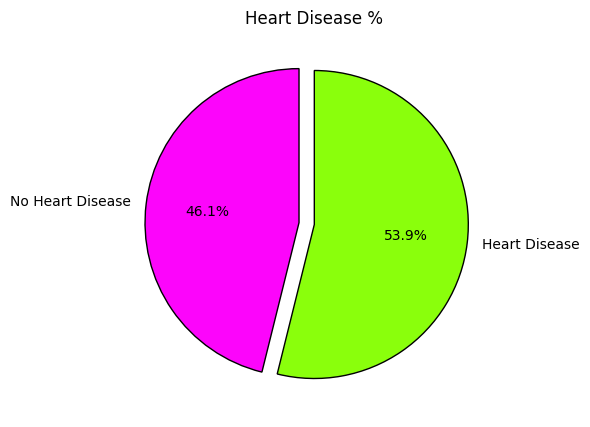

In [10]:
# 🎨 Color palette and pie chart values
mypal = ['#FC05FB', '#8aff0c', '#FCD2FC', '#F3FEFA', '#B4FFE4', '#fd3d30']
target_counts = list(df['heart_disease'].value_counts())
circle = [
    target_counts[1] / sum(target_counts) * 100,
    target_counts[0] / sum(target_counts) * 100
]

fig, ax = plt.subplots(figsize=(6, 5))
plt.pie(
    circle,
    labels=['No Heart Disease', 'Heart Disease'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0),
    colors=mypal,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Heart Disease %')

**Countplot - Target Variable Distribution**

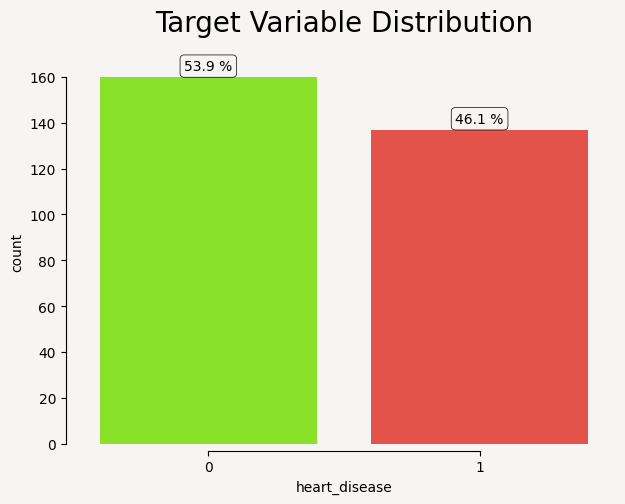

In [11]:
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['heart_disease'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., height + 3,
        '{:1.1f} %'.format((height / total) * 100),
        ha="center",
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5)
    )

ax.set_title('Target Variable Distribution', fontsize=20, y=1.05)
sns.despine(right=True, offset=5, trim=True)

**Distribution of Features after Numerical Encoding**

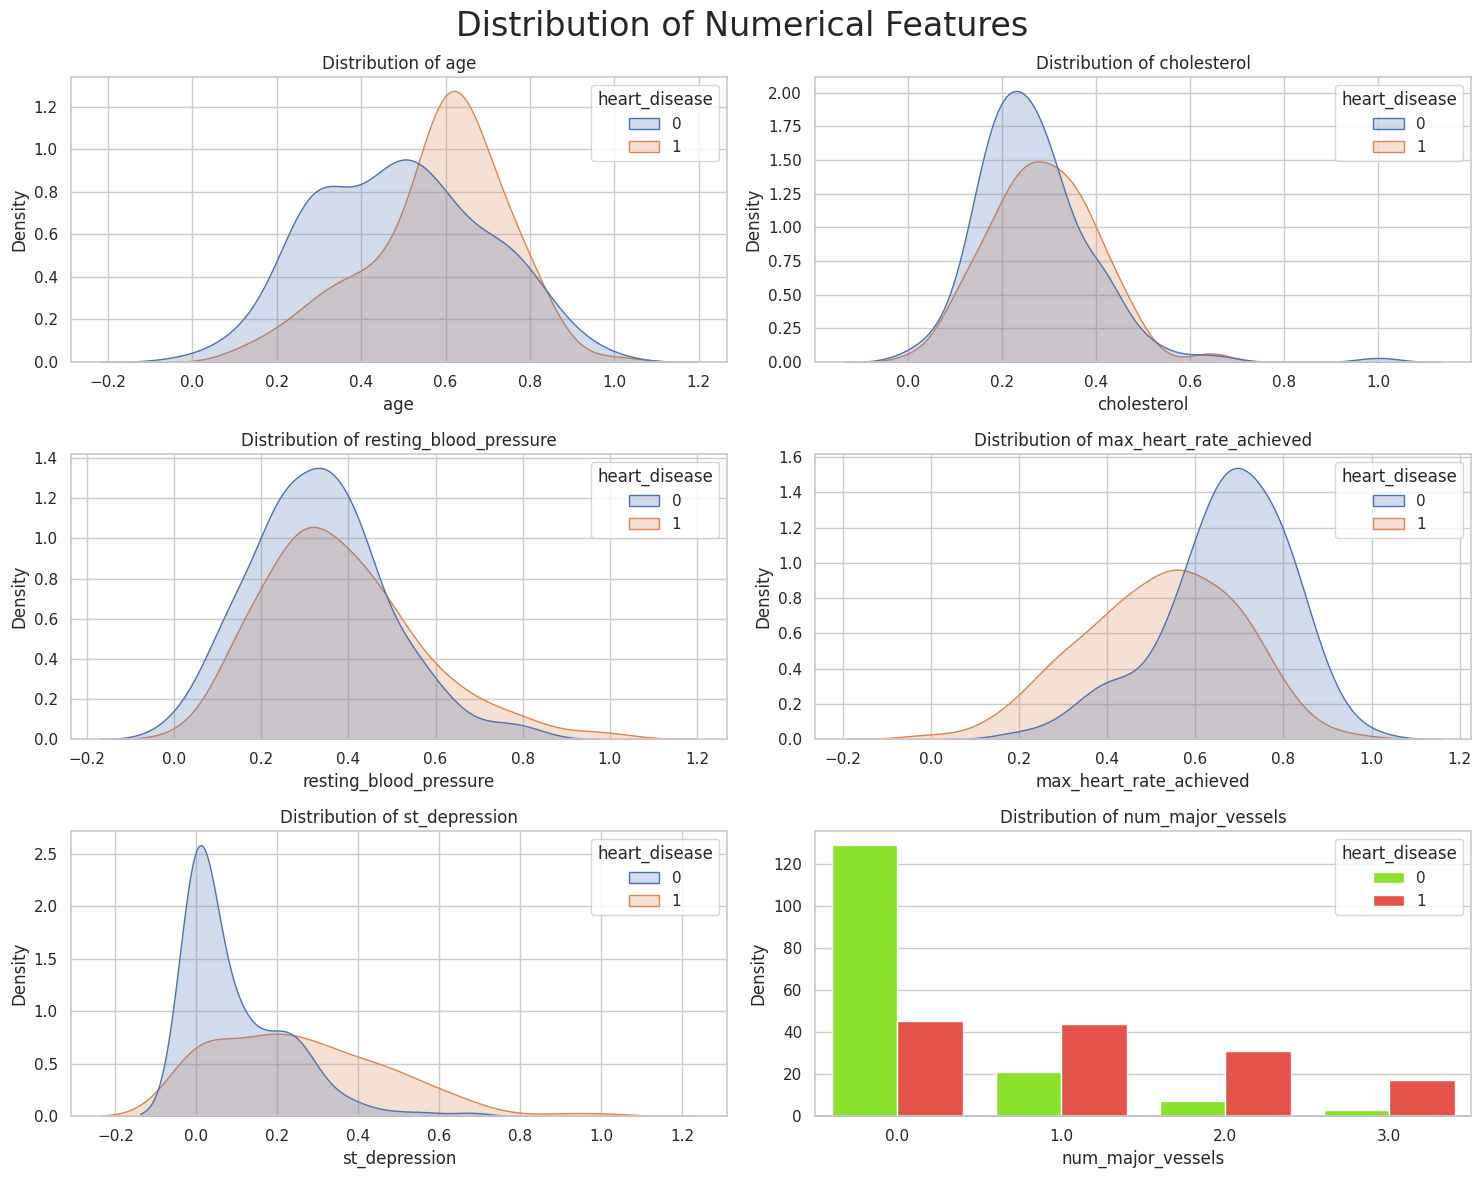

In [12]:
# Set plot style
sns.set(style="whitegrid")

# Create KDE plots
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_feats, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df, x=col, fill=True, color=mypal, hue='heart_disease')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

        # Add countplot overlay for 'num_major_vessels'
    if col == 'num_major_vessels':
        sns.countplot(data=df, x=col, hue=df['heart_disease'], palette=mypal[1::4])
        for p in ax.patches:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2., height + 3,
                '{:1.0f}'.format(height),
                ha="center",
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5)
            )

plt.suptitle('Distribution of Numerical Features', fontsize=24)
plt.tight_layout()
plt.show()

**Train Test Split**

In [13]:
target_col = 'heart_disease'
test_size=0.30
seed=30 #for reproducibility

features = df.columns.drop(target_col)
X = df[features]
y = df[target_col]

#stratified data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)

print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of y_test is {y_test.shape}')

The shape of X_train is (207, 13)
The shape of y_train is (207,)
The shape of X_test is (90, 13)
The shape of y_test is (90,)


In [14]:
X.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,0.708333,1,1,0.481132,0.244292,1,2,0.603053,0,0.370968,3,0.0,6.0
1,0.791667,1,4,0.622642,0.365297,0,2,0.282443,1,0.241935,2,3.0,3.0
2,0.791667,1,4,0.245283,0.235160,0,2,0.442748,1,0.419355,2,2.0,7.0
3,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0,0.564516,3,0.0,3.0
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0,0.225806,1,0.0,3.0


# **Evaluation Metrics**

**Confusion Matrix Function**

In [15]:
def plot_conf_matrix(names, classifiers, nrows, ncols, fig_w, fig_h, X_train, X_val, y_train, y_val):
    """
    Plots confusion matrices in a grid of subplots.
    """
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_w, fig_h))

    for clf, name, ax in zip(classifiers, names, axes.flatten()):
        clf.fit(X_train, y_train)
        ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, ax=ax)
        ax.set_title(name)

    plt.tight_layout()
    plt.show()

**ROC Curve Function**

In [16]:
def roc_auc_curve(names, classifiers, X_train, X_val, y_train, y_val):
    """
    Plots ROC AUC curves for multiple classifiers.
    """
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred_proba = clf.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves', fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

**Scoring Summary Function**

In [17]:
def score_summary(names, classifiers, X_train, X_val, y_train, y_val):
    """
    Computes accuracy, ROC AUC, recall, precision, and F1 score for classifiers.
    """
    results = []

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        pred_proba = clf.predict_proba(X_val)[:, 1]

        accuracy = accuracy_score(y_val, pred)
        roc_auc = auc(*roc_curve(y_val, pred_proba)[:2])
        cm = confusion_matrix(y_val, pred)

        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
        f1 = 2 * recall * precision / (recall + precision)

        results.append([name, accuracy * 100, roc_auc, recall, precision, f1])

    cols = ["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    return pd.DataFrame(results, columns=cols).round(2)

**Display Sorted Scores**

In [18]:
def display_scores(scores_df):
    return scores_df.sort_values(by='Accuracy', ascending=False) \
        .style.background_gradient(cmap='coolwarm') \
        .bar(subset=["ROC_AUC"], color='#6495ED') \
        .bar(subset=["Recall"], color='#ff355d') \
        .bar(subset=["Precision"], color='lightseagreen') \
        .bar(subset=["F1"], color='gold')

# **Models**

**Model Initialization**

In [19]:
def get_classifiers(seed=0):
    names = [
        'Support Vectors',
        'Random Forest',
        'Logistic Regression',
        'Nearest Neighbors',
    ]

    classifiers = [
        SVC(probability=True, random_state=seed),
        RandomForestClassifier(random_state=seed),
        LogisticRegression(solver="liblinear", random_state=seed),
        KNeighborsClassifier(n_neighbors=2),
    ]

    return names, classifiers

**Execution**

In [23]:
names, classifiers = get_classifiers(seed=30)
# Evaluate and display
scores_df = score_summary(names, classifiers, X_train, X_test, y_train, y_test)

# **Post Model Visuals**

**Score Summary**

In [22]:
display_scores(scores_df)

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
1,Random Forest,87.780000,0.940000,0.810000,0.920000,0.860000
2,Logistic Regression,87.780000,0.930000,0.830000,0.900000,0.860000
0,Support Vectors,86.670000,0.930000,0.830000,0.880000,0.850000
3,Nearest Neighbors,82.220000,0.880000,0.670000,0.930000,0.780000


**Confusion Matrix**

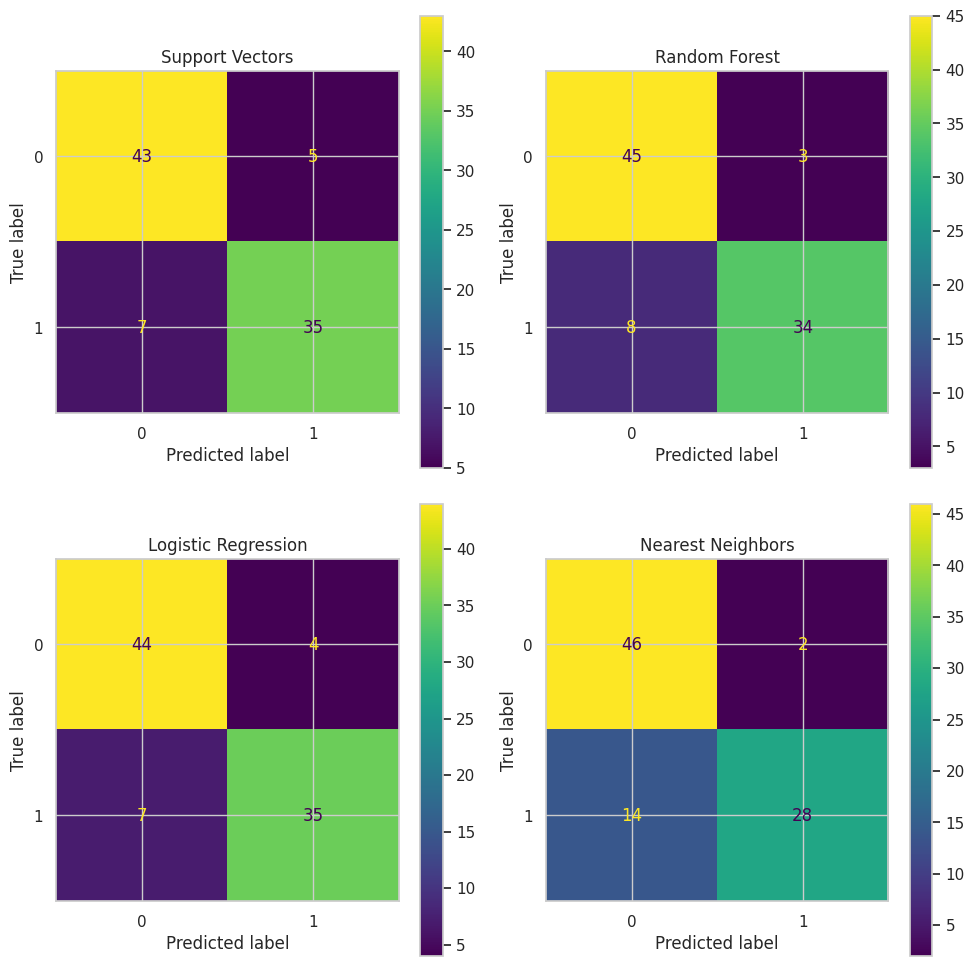

In [21]:
plot_conf_matrix(names, classifiers, 2, 2, 10, 10, X_train, X_test, y_train, y_test)

**ROC Curves**

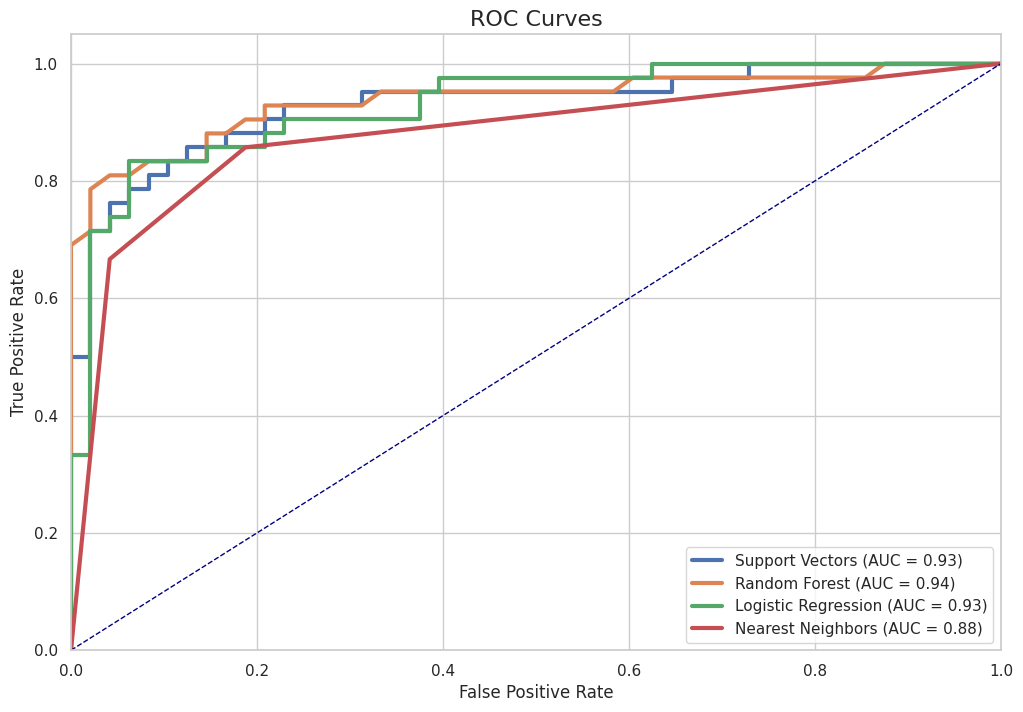

In [24]:
roc_auc_curve(names, classifiers, X_train, X_test, y_train, y_test)